In [1]:
import pandas as pd
import numpy as np

#reading the excel file
df = pd.read_csv('PGPM-BAAI student data CSV.csv')

In [2]:
df.head()

,Unnamed: 0,Name,Age,No.of.yrs of Education,Exp(in yrs),Household Size,Monthly Food Budget,Monthly Rent Budget,Veg/NVeg,"monthly/annual(0=month,1=annual,2=bothfine)",advance budget,Alcohol (0/1),"Your Gender(0-Male,1-Female)","Preferred Roommate (0-male, 1 -female, 2- any"
0,FT221001,AADARSH S,24.0,18.0,2.0,3.0,10000,30000,0.0,0.0,50000,0.0,0.0,2.0
1,FT221005,ABHIMANYU SWAMI,26.0,18.0,3.0,3.0,8000,12000,0.0,0.0,40000,1.0,0.0,0.0
2,FT221006,ABHINAV SINGH,26.0,19.0,3.0,3.0,5000,12000,1.0,0.0,20000,1.0,0.0,2.0
3,FT221010,ABHISHEK GUPTA,26.0,19.0,3.0,4.0,6000,17000,1.0,0.0,25000,0.0,0.0,2.0
4,FT221013,ADITI KAMRA,26.0,19.0,3.0,5.0,5000,15000,0.0,0.0,25000,0.0,1.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     104 non-null    object 
 1   Name                                           104 non-null    object 
 2   Age                                            99 non-null     float64
 3   No.of.yrs of Education                         98 non-null     float64
 4   Exp(in yrs)                                    99 non-null     float64
 5   Household Size                                 99 non-null     float64
 6   Monthly Food Budget                            98 non-null     object 
 7   Monthly Rent Budget                            98 non-null     object 
 8   Veg/NVeg                                       98 non-null     float64
 9   monthly/annual(0=month,1=annual,2=bothfine)    98 non-

In [4]:
#renaming the column
df.columns=["Roll No","Name","Age","Education","Exp","H_size","F_Budget","R_Budget","F_Pref","Rent_Pref","Adv","Alcohol_Pref","Gender","Room_Pref"]

In [5]:
df.head()

,Roll No,Name,Age,Education,Exp,H_size,F_Budget,R_Budget,F_Pref,Rent_Pref,Adv,Alcohol_Pref,Gender,Room_Pref
0,FT221001,AADARSH S,24.0,18.0,2.0,3.0,10000,30000,0.0,0.0,50000,0.0,0.0,2.0
1,FT221005,ABHIMANYU SWAMI,26.0,18.0,3.0,3.0,8000,12000,0.0,0.0,40000,1.0,0.0,0.0
2,FT221006,ABHINAV SINGH,26.0,19.0,3.0,3.0,5000,12000,1.0,0.0,20000,1.0,0.0,2.0
3,FT221010,ABHISHEK GUPTA,26.0,19.0,3.0,4.0,6000,17000,1.0,0.0,25000,0.0,0.0,2.0
4,FT221013,ADITI KAMRA,26.0,19.0,3.0,5.0,5000,15000,0.0,0.0,25000,0.0,1.0,1.0


In [6]:
#checking for null data
df[['F_Pref','Rent_Pref', 'Alcohol_Pref', 'Room_Pref']].isnull().sum()

F_Pref          6
Rent_Pref       6
Alcohol_Pref    6
Room_Pref       7
dtype: int64

In [7]:
#dropping null data
df. dropna(subset = ["F_Pref"], inplace=True)

In [8]:
#checking for null data
df[['F_Pref','Rent_Pref','Alcohol_Pref', 'Room_Pref']].isnull().sum()

F_Pref          0
Rent_Pref       0
Alcohol_Pref    0
Room_Pref       1
dtype: int64

In [9]:
#dropping null data
df. dropna(subset = ['Room_Pref'], inplace=True)

In [10]:
df[['F_Pref','Rent_Pref','Alcohol_Pref', 'Room_Pref']].isnull().sum()

F_Pref          0
Rent_Pref       0
Alcohol_Pref    0
Room_Pref       0
dtype: int64

In [11]:
df.reset_index(drop=True,inplace=True)

In [12]:
df.head()

,Roll No,Name,Age,Education,Exp,H_size,F_Budget,R_Budget,F_Pref,Rent_Pref,Adv,Alcohol_Pref,Gender,Room_Pref
0,FT221001,AADARSH S,24.0,18.0,2.0,3.0,10000,30000,0.0,0.0,50000,0.0,0.0,2.0
1,FT221005,ABHIMANYU SWAMI,26.0,18.0,3.0,3.0,8000,12000,0.0,0.0,40000,1.0,0.0,0.0
2,FT221006,ABHINAV SINGH,26.0,19.0,3.0,3.0,5000,12000,1.0,0.0,20000,1.0,0.0,2.0
3,FT221010,ABHISHEK GUPTA,26.0,19.0,3.0,4.0,6000,17000,1.0,0.0,25000,0.0,0.0,2.0
4,FT221013,ADITI KAMRA,26.0,19.0,3.0,5.0,5000,15000,0.0,0.0,25000,0.0,1.0,1.0


In [13]:
df['F_Budget'] = df['F_Budget'].str.replace(',', '')
df['F_Budget'] = df['F_Budget'].astype(float)

df['R_Budget'] = df['R_Budget'].str.replace(',', '')
df['R_Budget'] = df['R_Budget'].astype(float)

df['Adv'] = df['Adv'].str.replace(',', '')
df['Adv'] = df['Adv'].astype(float)

In [14]:
#converting the preferences column from float to int
convert_dict = {'F_Pref': int,'Alcohol_Pref': int, 'Rent_Pref': int,'Room_Pref': int, 'F_Budget': float, 'R_Budget':float}
df = df.astype(convert_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Roll No       97 non-null     object 
 1   Name          97 non-null     object 
 2   Age           97 non-null     float64
 3   Education     97 non-null     float64
 4   Exp           97 non-null     float64
 5   H_size        97 non-null     float64
 6   F_Budget      97 non-null     float64
 7   R_Budget      97 non-null     float64
 8   F_Pref        97 non-null     int32  
 9   Rent_Pref     97 non-null     int32  
 10  Adv           97 non-null     float64
 11  Alcohol_Pref  97 non-null     int32  
 12  Gender        97 non-null     float64
 13  Room_Pref     97 non-null     int32  
dtypes: float64(8), int32(4), object(2)
memory usage: 9.2+ KB


In [18]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
df1 = df

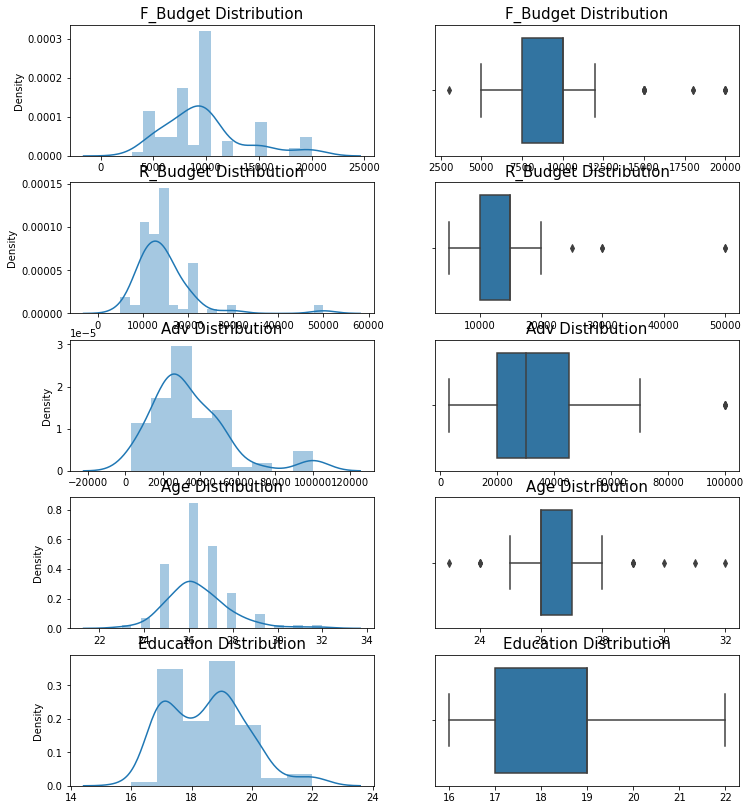

In [21]:
# Univariate analysis
# categorucal columns converted to mumber like Gender etc are not taken into considerations

import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12, 14)
x= df1['F_Budget']
a = sns.distplot(x=x, ax=axes[0][0])
a.set_title("F_Budget Distribution",fontsize=15)
a = sns.boxplot(x=x , orient = "v" , ax=axes[0][1])
a.set_title("F_Budget Distribution",fontsize=15)
a.set(xlabel=None)

x= df1['R_Budget']
a = sns.distplot(x=x , ax=axes[1][0])
a.set_title("R_Budget Distribution",fontsize=15)
a = sns.boxplot(x=x , orient = "v" , ax=axes[1][1])
a.set_title("R_Budget Distribution",fontsize=15)
a.set(xlabel=None)

x= df1['Adv']
a = sns.distplot(x=x , ax=axes[2][0])
a.set_title("Adv Distribution",fontsize=15)
a = sns.boxplot(x=x , orient = "v" , ax=axes[2][1])
a.set_title("Adv Distribution",fontsize=15)
a.set(xlabel=None)

x= df1['Age']
a = sns.distplot(x=x , ax=axes[3][0])
a.set_title("Age Distribution",fontsize=15)
a = sns.boxplot(x=x , orient = "v" , ax=axes[3][1])
a.set_title("Age Distribution",fontsize=15)
a.set(xlabel=None)

x= df1['Education']
a = sns.distplot(x=x , ax=axes[4][0])
a.set_title("Education Distribution",fontsize=15)
a = sns.boxplot(x=x , orient = "v" , ax=axes[4][1])
a.set_title("Education Distribution",fontsize=15)
a.set(xlabel=None)

plt.show()

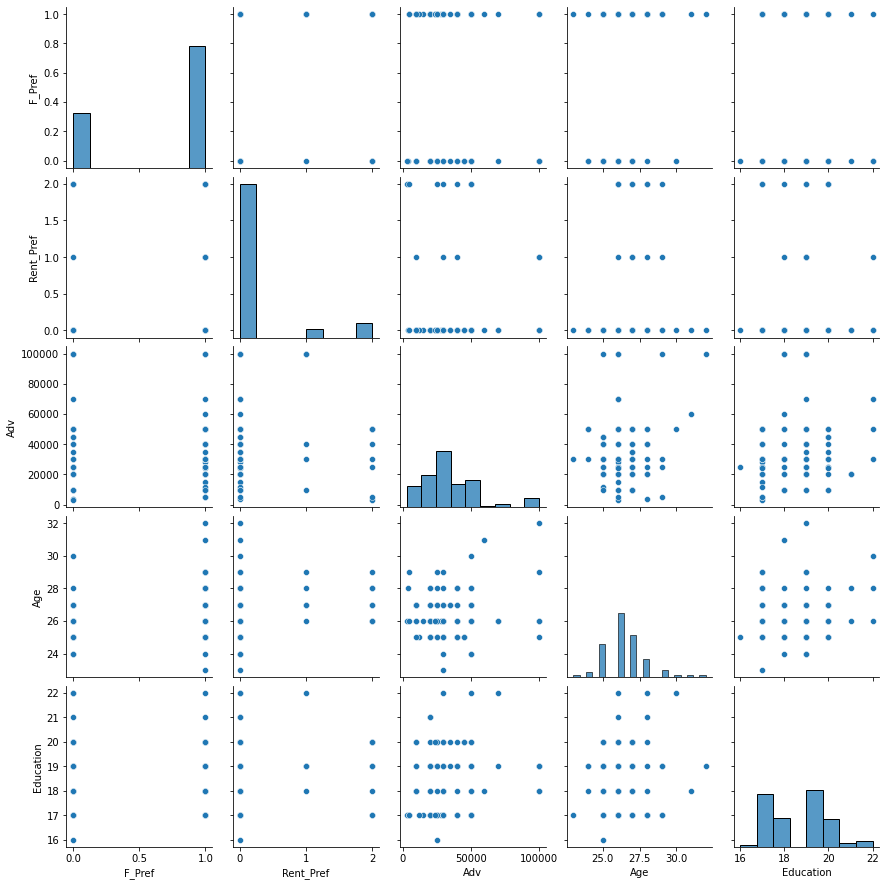

In [22]:
sns.pairplot(df1[['F_Pref','Rent_Pref','Adv','Age','Education']]) 
# shows that only age, advance and education are some what co related 
# same can be seen in the heat map below

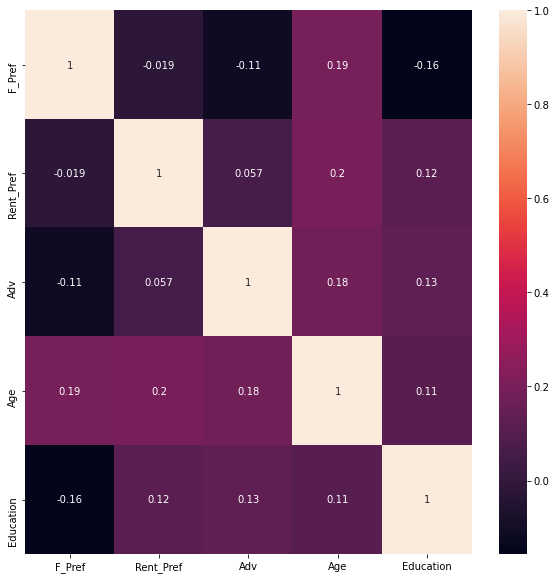

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df1[['F_Pref','Rent_Pref','Adv','Age','Education']].corr(),annot=True)
plt.show()

In [ ]:
# since all other columns are categorical converted into numbers
# bivariate analysis would have been possible for those columns if there is a clear dependent variable
# which is not possible in our case cause this falls under unsupervised learning.
# but below are some of the scenarios that can be inferred

<AxesSubplot:xlabel='Exp', ylabel='count'>

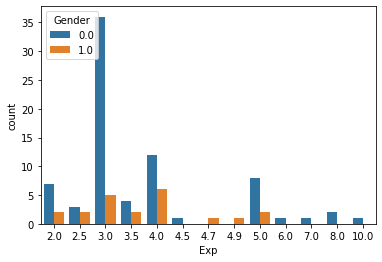

In [24]:
x=df1['Exp']
sns.countplot(x=x,hue = df1["Gender"])
# like telling higher experience people are only males and median contain only females

<AxesSubplot:xlabel='Gender', ylabel='count'>

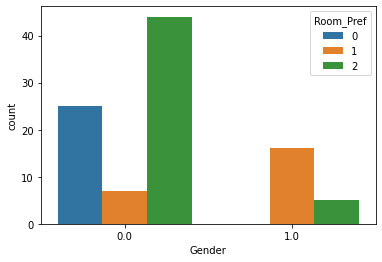

In [25]:
x=df1['Gender']
sns.countplot(x=x,hue = df1["Room_Pref"])
# majority of male prefer any roommates while majority of female prefer female roommates

<AxesSubplot:xlabel='Gender', ylabel='count'>

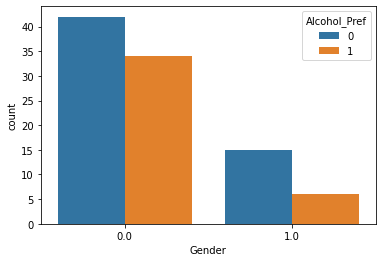

In [27]:
x=df1['Gender']
sns.countplot(x=x,hue = df1["Alcohol_Pref"])

# majorly both male and female donot prefer alcohol room mates.

In [180]:
Name = df['Name']
indices = pd.Series(df.index,index=Name)
indices

Name
AADARSH S                    0
ABHIMANYU SWAMI              1
ABHINAV SINGH                2
ABHISHEK GUPTA               3
ADITI KAMRA                  4
                            ..
UPPU MANI VEERA RAGHURAM    92
VARUN MADDINENI             93
VISHAL GUHA ROY             94
BAVNEET KAUR                95
Vinay Singh Chauhan         96
Length: 97, dtype: int64

In [181]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import pandas as pd
from sklearn import preprocessing

In [182]:
df.Name

0                    AADARSH S
1              ABHIMANYU SWAMI
2                ABHINAV SINGH
3               ABHISHEK GUPTA
4                  ADITI KAMRA
                ...           
92    UPPU MANI VEERA RAGHURAM
93             VARUN MADDINENI
94             VISHAL GUHA ROY
95                BAVNEET KAUR
96         Vinay Singh Chauhan
Name: Name, Length: 97, dtype: object

In [183]:
#Defining recommendation system
def recommend(Name):
    global df
    df_1=df
    Name = Name.upper()
    df_rec=df.loc[df['Name'] == Name]
    
    #using preferences columns to filter the data
    if df_rec['F_Pref'].values==0:
        df_1=df_1.loc[df_1['F_Pref']==int(df_rec['F_Pref'].values)]
    if df_rec['Alcohol_Pref'].values==0:
        df_1=df_1.loc[df_1['Alcohol_Pref']==int(df_rec['Alcohol_Pref'].values)]
    if df_rec['Room_Pref'].values==0 or df_rec['Room_Pref'].values==1:
        df_1=df_1.loc[df_1['Room_Pref']==int(df_rec['Room_Pref'].values)]
    if df_rec['Rent_Pref'].values==0:
        df_1=df_1.loc[df_1['Rent_Pref']==int(df_rec['Rent_Pref'].values)]
     
    #taking only necessary columns to find similar people
    df_2=df_1[['Roll No','Name','Age','Education','F_Budget','R_Budget','Adv']] #taking only necessary columns
    df_2.set_index(['Roll No','Name'], inplace=True)
    x = df_2.values    
    
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_3 = pd.DataFrame(x_scaled)
    #scaler = StandardScaler()
    #df_2 = scaler.fit_transform(df_1)
    df_3= pd.DataFrame(data=df_3.values.tolist(), columns=df_2.columns.tolist(),index=df_1.Name.tolist())
    dist_matrix = dist=cdist(df_3, df_3, 'euclid')
    p=np.shape(dist_matrix)[0]
    dist_matrix = np.reshape(dist_matrix,(p,p))
    idx=indices[Name]
    sim_scores = list(enumerate(dist_matrix[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1])
    sim_scores = sim_scores[1:5]
    print (sim_scores)
    Name_indices = [i[0] for i in sim_scores]
    return df.iloc[Name_indices]
    

In [185]:
recommend("Arun NamBiaR")

[(26, 0.22679771583201), (22, 0.24929592212895), (57, 0.2572673890375006), (7, 0.27755576720114655)]


,Roll No,Name,Age,Education,Exp,H_size,F_Budget,R_Budget,F_Pref,Rent_Pref,Adv,Alcohol_Pref,Gender,Room_Pref
26,FT222006,ARINDAM KALRA,26.0,17.0,3.0,5.0,10000.0,18000.0,0,0,30000.0,0,0.0,0
22,FT221074,BANUGU SUHAS REDDY,26.0,20.0,4.0,3.0,9000.0,10000.0,1,2,30000.0,0,0.0,2
57,FT223047,RAJ SINGH RAJAWAT,26.0,22.0,3.0,4.0,10000.0,15000.0,0,0,70000.0,0,0.0,0
7,FT221025,AKSHAT PARAG,26.0,17.0,3.0,4.0,20000.0,15000.0,1,0,15000.0,0,0.0,2
